In [86]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter



In [122]:
content = [
'SECURITY DESCRIPTION                    CLASS        CUSIP      SHARES   VALUE  (A)    (B)     (C)     MGR      (A)     (B)    (C)  ',
'------------------------------------------------------------------------------------------------------------------------------------',
'Ade Corporation                          COM      00089C107    212.950    2.438  X                            201.900    0    11.050',
'AVX, Corp.                               COM      002444107   1.498.286  24.467  X                          1,402.846    0    95.440',
'Aegis Realty Inc.                        COM      00760P104     7.200      81    X                              7.200    0         ',
'Agere Systems Inc. CL B                 CL B      00845V209       2         0    X                                  0    0         2',
'Alamo Group, Inc.                        COM      011311107    165.300    2.480  X                            162.400    0     2.900',
'------------------------------------------------------------------------------------------------------------------------------------',

]
content = [
'    Name of Issuer                  Class      CUSIP   (x 1,000)   Amount    /PRN  /Call Discretion Managers   Sole   Shared None       ',
'----------------------------------------------------------------------------------------------------------------------------------------',
'HOLOGIC CONV V-A             BONDPAYING                                                                                                 ',
'   2.000% 12/15/37           PERIODIC                                   PAR          SHARED -                                           ',
'                             INCOME      436440AA9    102.64     105000 VALUE        Other            14   102.64                       ',
'KINROSS GOLD CONV            BONDPAYING                                                                                                 ',
'   1.750% 3/15/28            PERIODIC                                   PAR          SHARED -                                           ',
'                             INCOME      496902AD9     88.99      90000 VALUE        Other            14    88.99                       ',
'L-3 COMM CORP CONV           BONDPAYING                                                                                                 ',
'   3.000% 8/01/35            PERIODIC                                   PAR          SHARED -                                           ',
'                             INCOME      502413AW7    136.50     140000 VALUE        Other            14   136.50                       ',
'MEDICIS PHARMA CONV          BONDPAYING                                                                                                 ',
'   1.375% 6/01/17            PERIODIC                                   PAR          SHARED -                                           ',
'                             INCOME      584690AC5     84.26      85000 VALUE        Other            14    84.26                       ',
'----------------------------------------------------------------------------------------------------------------------------------------',
]

In [123]:
import numpy as np
arr = np.asarray(     # use the result as a 2D array
list(map(lambda string:      # mapped for each line in the content
list(map(lambda x: x in (' ', '.'), string)),    # tell letters from whitespaces
content))).astype(int)     # True/False to 1/0.
arr.shape

(15, 136)

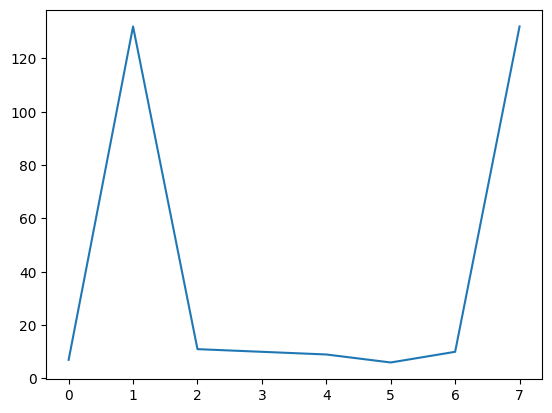

In [109]:
from collections import Counter
import matplotlib.pyplot as plt
repetitiveness = np.asarray([max(Counter(line.replace(' ', '')).values(),default=0) for line in content])
_ = plt.plot(repetitiveness)

Extracted table:
------------------------------------------------------------------------------------------------------------------------------------
Ade Corporation                          COM      00089C107    212.950    2.438  X                            201.900    0    11.050
AVX, Corp.                               COM      002444107   1.498.286  24.467  X                          1,402.846    0    95.440
Aegis Realty Inc.                        COM      00760P104     7.200      81    X                              7.200    0
Agere Systems Inc. CL B                 CL B      00845V209       2         0    X                                  0    0         2
Alamo Group, Inc.                        COM      011311107    165.300    2.480  X                            162.400    0     2.900


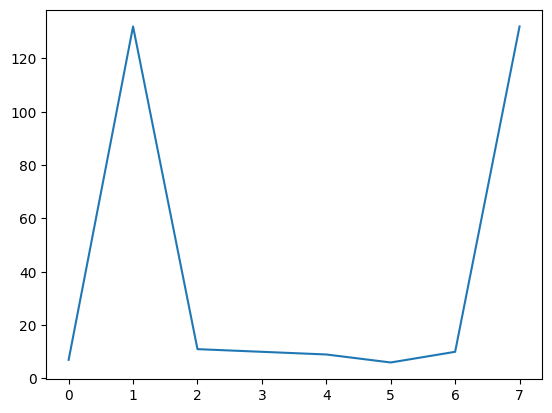

In [138]:

proj_x = (~arr).sum(axis=0)
proj_y = (~arr).sum(axis=1)
proj_x_diff_y = np.ediff1d(proj_x)
proj_x_diff_y = np.insert(proj_x_diff_y, 0, proj_x[0])
proj_x_diff_x = np.arange(len(proj_x))
proj_x_diff = np.stack([proj_x_diff_x, proj_x_diff_y]).transpose()
proj_x_diff_y_min = proj_x_diff_y.min()
proj_x_diff_y_max = proj_x_diff_y.max()
proj_x_diff_y_threshold = .5*(proj_x_diff_y_max-proj_x_diff_y_min)+proj_x_diff_y_min
column_positions_start = np.where( proj_x_diff_y >  proj_x_diff_y_threshold )
# column_positions_start = column_positions_start.astype(int)  # Ensure this is a 1D array of integers

column_positions_end   = np.where( proj_x_diff_y < -proj_x_diff_y_threshold )
from collections import Counter
repetitiveness = np.asarray([max(Counter(line.replace(' ', '')).values(),default=0) for line in content])
_ = plt.plot(repetitiveness)
start_row = np.argmax(repetitiveness >= 0.5 * max(repetitiveness))
end_row = start_row + np.argmax(repetitiveness[start_row:] < 0.5 * max(repetitiveness[start_row:]))

# Extract the table rows based on detected positions
table_content = content[start_row:end_row+len(arr)-3]

# Further processing to clean and separate the cells could be done here
# (e.g., using the column_positions_start and column_positions_end)

print("Extracted table:")
for row in table_content:
    print(row.strip())



In [157]:
import re

# Example content
content = [
    'SECURITY DESCRIPTION                    CLASS        CUSIP      SHARES   VALUE  (A)                 MGR      (A)     (B)    (C)       ',
    '--------------------------------------------------------------------------------------------------------------------------------------',
    '"Ade Corporation"                          COM      00089C107    212.950    2.438  X                            201.900    0    11.050',
    '"AVX, Corp."                               COM      002444107   1.498.286  24.467  X                          1,402.846    0    95.440',
    '"Aegis Realty Inc."                        COM      00760P104     7.200      81    X                              7.200    0          ',
    '"Agere Systems Inc. CL B"                 CL B      00845V209       2         0    X                                       0         2',
    '"Alamo Group, Inc."                        COM      011311107    165.300    2.480  X                            162.400    0     2.900',
    '--------------------------------------------------------------------------------------------------------------------------------------',
]
import numpy as np
arr = np.asarray(     # use the result as a 2D array
list(map(lambda string:      # mapped for each line in the content
list(map(lambda x: x in (' ', '.'), string)),    # tell letters from whitespaces
content))).astype(int)     # True/False to 1/0.
arr.shape
def extract_columns(row):
    """
    Extract columns from a row where quoted text should be treated as a single column.
    """
    # Regex to match quoted text and non-quoted segments
    parts = re.findall(r'"[^"]*"|\S+', row)
    return [part.strip() for part in parts]

def determine_boundaries(header_row):
    """
    Determine column boundaries based on a sample header row.
    """
    parts = extract_columns(header_row)
    boundaries = []
    start = 0

    for part in parts:
        end = start + len(part)
        boundaries.append((start, end))
        start = end

    return boundaries

def format_row(row, boundaries):
    """
    Format a single row based on the determined column boundaries.
    """
    columns = extract_columns(row)
    return ' | '.join(columns)

# Determine boundaries from the header row or any row with consistent formatting
header_row = content[0]
boundaries = determine_boundaries(header_row)

# Process and print each row using the detected boundaries
print("Extracted table:")
for row in content:
    if row.strip() and not row.startswith('-'):
        formatted_row = format_row(row, boundaries)
        print(formatted_row)


Extracted table:
SECURITY | DESCRIPTION | CLASS | CUSIP | SHARES | VALUE | (A) | MGR | (A) | (B) | (C)
"Ade Corporation" | COM | 00089C107 | 212.950 | 2.438 | X | 201.900 | 0 | 11.050
"AVX, Corp." | COM | 002444107 | 1.498.286 | 24.467 | X | 1,402.846 | 0 | 95.440
"Aegis Realty Inc." | COM | 00760P104 | 7.200 | 81 | X | 7.200 | 0
"Agere Systems Inc. CL B" | CL | B | 00845V209 | 2 | 0 | X | 0 | 2
"Alamo Group, Inc." | COM | 011311107 | 165.300 | 2.480 | X | 162.400 | 0 | 2.900


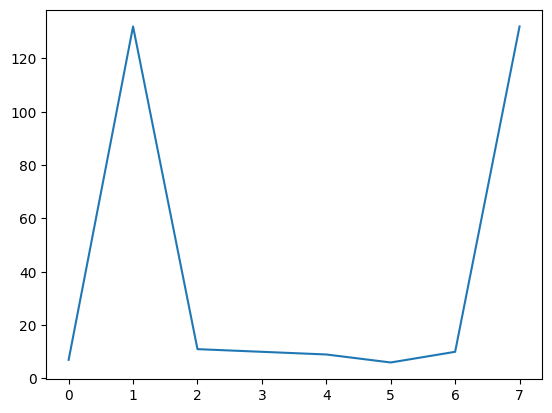

Extracted table:
------------------------------------------------------------------------------------------------------------------------------------
Ade Corporation                          COM      00089C107    212.950    2.438  X                            201.900    0    11.050
AVX, Corp.                               COM      002444107   1.498.286  24.467  X                          1,402.846    0    95.440
Aegis Realty Inc.                        COM      00760P104     7.200      81    X                              7.200    0
Agere Systems Inc. CL B                 CL B      00845V209       2         0    X                                  0    0         2
Alamo Group, Inc.                        COM      011311107    165.300    2.480  X                            162.400    0     2.900


In [96]:
len(arr)-3

5

In [126]:
import numpy as np
import re

# Define content
content = [
    'SECURITY DESCRIPTION                    CLASS        CUSIP      SHARES   VALUE  (A)    (B)     (C)     MGR      (A)     (B)    (C)  ',
    '------------------------------------------------------------------------------------------------------------------------------------',
    'Ade Corporation                          COM      00089C107    212.950    2.438  X                            201.900    0    11.050',
    'AVX, Corp.                               COM      002444107   1.498.286  24.467  X                          1,402.846    0    95.440',
    'Aegis Realty Inc.                        COM      00760P104     7.200      81    X                              7.200    0         ',
    'Agere Systems Inc. CL B                 CL B      00845V209       2         0    X                                  0    0         2',
    'Alamo Group, Inc.                        COM      011311107    165.300    2.480  X                            162.400    0     2.900',
    '------------------------------------------------------------------------------------------------------------------------------------',
]

# Convert text content to a 2D binary array
def text_to_binary_array(content):
    # Find the maximum line length to pad all lines to the same length
    max_length = max(len(line) for line in content)
    arr = np.array([list(line.ljust(max_length)) for line in content])
    # Convert to binary array where True represents a whitespace
    return np.where(arr == ' ', 1, 0)

# Identify column positions based on gaps of spaces
def find_column_boundaries(binary_array):
    # Sum the rows to detect columns by counting gaps
    whitespace_sums = binary_array.sum(axis=0)
    column_boundaries = []
    
    in_gap = False
    for i, count in enumerate(whitespace_sums):
        if count == binary_array.shape[0] and not in_gap:
            in_gap = True
            column_boundaries.append(i)
        elif count < binary_array.shape[0] and in_gap:
            in_gap = False
            column_boundaries.append(i)
    
    return column_boundaries

# Convert binary array back to text rows using detected column boundaries
def extract_columns(content, column_boundaries):
    columns = []
    for row in content:
        row = row.rstrip()  # Remove trailing whitespace
        split_row = []
        prev_idx = 0
        for idx in column_boundaries:
            if prev_idx < len(row):
                split_row.append(row[prev_idx:idx].strip())
            prev_idx = idx
        if prev_idx < len(row):
            split_row.append(row[prev_idx:].strip())  # Add the last column
        columns.append(','.join(split_row))
    return columns

# Process content
binary_array = text_to_binary_array(content)
column_boundaries = find_column_boundaries(binary_array)
table_content = extract_columns(content, column_boundaries)

# Print result
print("Extracted table with comma-separated columns:")
for line in table_content:
    print(line)


Extracted table with comma-separated columns:
SECURITY DESCRIPTION                    CLASS        CUSIP      SHARES   VALUE  (A)    (B)     (C)     MGR      (A)     (B)    (C)
------------------------------------------------------------------------------------------------------------------------------------
Ade Corporation                          COM      00089C107    212.950    2.438  X                            201.900    0    11.050
AVX, Corp.                               COM      002444107   1.498.286  24.467  X                          1,402.846    0    95.440
Aegis Realty Inc.                        COM      00760P104     7.200      81    X                              7.200    0
Agere Systems Inc. CL B                 CL B      00845V209       2         0    X                                  0    0         2
Alamo Group, Inc.                        COM      011311107    165.300    2.480  X                            162.400    0     2.900
-----------------------------------

In [134]:
import numpy as np

# Define content
content = [
    'SECURITY DESCRIPTION                    CLASS        CUSIP      SHARES   VALUE  (A)    (B)     (C)     MGR      (A)     (B)    (C)  ',
    '------------------------------------------------------------------------------------------------------------------------------------',
    'Ade Corporation                          COM      00089C107    212.950    2.438  X                            201.900    0    11.050',
    'AVX, Corp.                               COM      002444107   1.498.286  24.467  X                          1,402.846    0    95.440',
    'Aegis Realty Inc.                        COM      00760P104     7.200      81    X                              7.200    0         ',
    'Agere Systems Inc. CL B                 CL B      00845V209       2         0    X                                  0    0         2',
    'Alamo Group, Inc.                        COM      011311107    165.300    2.480  X                            162.400    0     2.900',
    '------------------------------------------------------------------------------------------------------------------------------------',
]

# Convert text content to a 2D binary array
def text_to_binary_array(content):
    max_length = max(len(line) for line in content)
    arr = np.array([list(line.ljust(max_length)) for line in content])
    return np.where(arr == ' ', 1, 0)

# Identify column positions based on gaps of spaces
def find_column_boundaries(binary_array):
    whitespace_sums = binary_array.sum(axis=0)
    column_boundaries = []
    
    in_gap = False
    for i, count in enumerate(whitespace_sums):
        if count == binary_array.shape[0] and not in_gap:
            in_gap = True
            column_boundaries.append(i)
        elif count < binary_array.shape[0] and in_gap:
            in_gap = False
            column_boundaries.append(i)
    
    return column_boundaries

# Extract the "CUSIP" column
def extract_cusip_column(content, column_boundaries, target_column_name='CUSIP'):
    header_row = content[0]
    split_header = []
    
    prev_idx = 0
    for idx in column_boundaries:
        split_header.append(header_row[prev_idx:idx].strip())
        prev_idx = idx
    split_header.append(header_row[prev_idx:].strip())  # Add the last column
    
    # Ensure no empty strings are in the split_header
    split_header = [col for col in split_header if col]
    split_header = split_header[0].split('  ')
    split_header = [field for field in split_header if field.strip() != '']

    print(f"Split header: {split_header}")  # Debugging line

    # Find the index of the target column
    try:
        cusip_idx = split_header.index(target_column_name)
    except ValueError:
        print(f"Error: '{target_column_name}' is not found in the header.")
        print(f"Detected headers: {split_header}")
        return []

    cusip_values = []
    for row in content[2:-1]:  # Skip header and separator lines
        prev_idx = 0
        split_row = []
        for idx in column_boundaries:
            split_row.append(row[prev_idx:idx].strip())
            prev_idx = idx
        split_row.append(row[prev_idx:].strip())  # Add the last column
        
        cusip_values.append(split_row[cusip_idx])
    
    return cusip_values

# Process content
binary_array = text_to_binary_array(content)
column_boundaries = find_column_boundaries(binary_array)
cusip_column = extract_cusip_column(content, column_boundaries)

# Print CUSIP column
print("Extracted CUSIP column values:")
for value in cusip_column:
    print(value)


Split header: ['SECURITY DESCRIPTION', 'CLASS', 'CUSIP', 'SHARES', ' VALUE', '(A)', '(B)', ' (C)', ' MGR', '(A)', ' (B)', '(C)']


IndexError: list index out of range

In [130]:
column_boundaries

[]

Named Entities, Phrases, and Concepts:
Apple (ORG)
U.K. (GPE)
$1 billion (MONEY)
Microsoft (ORG)
London (GPE)

Matching Keywords:
Found keyword: Apple
Found keyword: startup
Found keyword: Microsoft
Found keyword: startup

Sentences mentioning 'startup':

Apple is looking at buying U.K. startup for $1 billion.
The startup, located in London, specializes in artificial intelligence and machine learning.

